<a href="https://colab.research.google.com/github/rakib06/AI/blob/master/Machine_Learning_Foundations_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ep -1. What is ML?

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
xs = np.array([1, 2, 3, 4, 5, 6, 10])
ys =np.array([100000, 150000, 200000, 250000, 300000, 350000, 550000])
model.fit(xs, ys, epochs=1000)
print(model.predict([7.0]))

Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 92852666368.0000
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 18327949312.0000
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 3911359232.0000
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 1119285248.0000
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 575354048.0000
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 466239968.0000
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 441258688.0000
Epoch 8/1000
1/1 [==============================] - 0s 1ms/step - loss: 432590912.0000
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: 427120192.0000
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 422309312.0000
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 417666528.0000
Epoch 12/1000
1/1 [================

# Ep -2. First steps in computer vision

In [4]:
# The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:
mnist  = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0

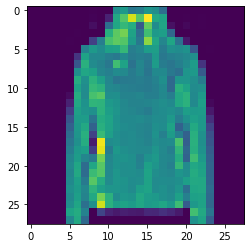

In [5]:
import matplotlib.pyplot as plt
plt.imshow(training_images[-10])

In [6]:
print(training_labels[-10])

4


In [7]:
print(training_images[-10])

[[  0   0   0   0   0   0   0   0   1   0   0 127 138 102 109 134 126  92
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0  24 154 187 239 188 255 154 148
    0   0   1   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   9   0  92 151 170 158  70 194 124 150
   11   0   5   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0 160 191 202 147  93 177 137 143
   85   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0  48 109 181 192 187 141 102 212 151 117
  150  96  17   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 113 138 124 145 147 170 109 116 141 143 107
  128 124 130  66   0   1   0   0   0   0]
 [  0   0   0   0   0   0  39 148 119 119 109 103 121 106 110 106 137 102
  110 114 119 126   0   0   0   0   0   0]
 [  0   0   0   0   0   0  70 162 123 114 102 177 147  97 117 102 141 107
  100 110 123 141  38   0   0   0   0   0]
 [  0   0   0   0   0   0 127 151 145 117 111 123 120 106 116  9

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [8]:
training_images = training_images / 255.0
test_images = test_images / 255.0

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them.

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now.

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

defining model

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4980 - accuracy: 0.8259
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3730 - accuracy: 0.8662
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3349 - accuracy: 0.8782
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3110 - accuracy: 0.8863
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2931 - accuracy: 0.8919
